Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitize and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
UsageError: Line magic function `%` not found.


In [103]:
#### load the movie and credit and create their dataframes

# The incorrect movies file was uploaded to Dropbox (with missing columns), this 
# version was found on Discord and will be used for the task

credits_df = pd.read_csv("Credit.txt", delim_whitespace=True)
movies_df = pd.read_csv("movies_1_1.csv", encoding = 'unicode_escape')

print(credits_df.head())
print(movies_df.head())

    Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331  
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam... 

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [104]:
# code here

# There is no 'title_y' column

movies_df.drop(['keywords', 'homepage', 'status', 
                'tagline', 'original_language', 'overview', 
                'production_companies', 'original_title'], 
                axis = 1, inplace=True)

In [105]:
movies_df.shape

(4803, 12)

#### Remove any duplicate rows

In [106]:
# code here

movies_df.drop_duplicates(subset='title', keep=False, inplace=True)

# The df shape shows a reduction in row count from the previous cell,
# indicating the duplicates have been removed successfully

movies_df.shape

(4797, 12)

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [113]:
# Code here 


movies_df.drop(movies_df[movies_df.budget < 1].index, inplace=True)

movies_df.drop(movies_df[movies_df.revenue < 1].index, inplace=True)

print(movies_df.shape)

# The df shape shows a reduction in row count from the previous cell,
# indicating the zero budget/revenue records have been removed successfully

(3226, 12)


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [122]:
# Change the release_date column to DateTime column

movies_df['DateTime'] = pd.to_datetime(movies_df['release_date'], format = '%Y/%m/%d')

# Extract the release year from every release date

movies_df['DateTime_year'] = pd.DatetimeIndex(movies_df['DateTime']).year

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [130]:
# code here 

# NOTE - budget and revenue columns are already int64 type, instructions unclear?

movies_df['budget']

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4773        27000
4788        12000
4792        20000
4796         7000
4798       220000
Name: budget, Length: 3226, dtype: int64

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [138]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')    # There are no columns called Cast int the csv file
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,DateTime,DateTime_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009-12-10,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007-05-19,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015-10-26,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012-07-16,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012-03-07,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

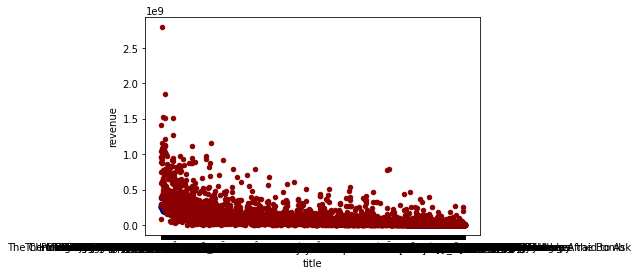

In [157]:
# Code here

budget_list = movies_df.sort_values(['budget'], ascending=False)

budget_list.loc[:, ['budget', 'title', 'revenue']]

ax1 = budget_list.plot.scatter(x='title', y='budget', c='DarkBlue')
ax1
ax2 = budget_list.plot.scatter(x='title', y='revenue', c='DarkRed', ax=ax1)

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [159]:
# code here

revenue_list = movies_df.sort_values(['revenue'], ascending=False)

revenue_list.loc[:, ['revenue', 'title', 'budget']]


,revenue,title,budget
0,2787965087,Avatar,237000000
25,1845034188,Titanic,200000000
16,1519557910,The Avengers,220000000
28,1513528810,Jurassic World,150000000
44,1506249360,Furious 7,190000000
...,...,...,...
3131,11,Of Horses and Men,10
2933,11,F.I.S.T.,11
3419,7,Bran Nue Dae,7
3875,7,Dreaming of Joseph Lees,2000000


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [169]:
# Code here

popularity_column = movies_df.sort_values('popularity', ascending=False)

popularity_column.loc[:, ['title', 'popularity']]

# Movies that have populatory above 7

popularity_7 = popularity_column[popularity_column.popularity > 7]

popularity_7


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,DateTime,DateTime_year
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015-06-17,2015
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014-11-05,2014
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016-02-09,2016
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014-07-30,2014
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015-05-13,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,98000000,"['Action', 'Adventure']",1408,7.029308,"['France', 'Germany', 'Italy', 'United States ...",1995-12-22,10017322,119.0,"['English', 'Latin']",Cutthroat Island,5.7,136,1995-12-22,1995
839,55000000,"['History', 'Drama', 'Music']",8818,7.027139,"['United States of America', 'Hungary']",1996-12-14,141047179,134.0,"['English', 'Español']",Evita,5.9,120,1996-12-14,1996
1939,25000000,"['Action', 'Adventure', 'Fantasy', 'Horror']",168705,7.008216,['United States of America'],2005-10-22,2405420,95.0,"['English', 'Português']",BloodRayne,3.5,118,2005-10-22,2005
1905,25000000,"['Drama', 'Horror', 'Mystery', 'Thriller']",43931,7.001176,['United States of America'],2010-10-08,19829957,107.0,['English'],My Soul to Take,5.2,147,2010-10-08,2010


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [187]:
# Code here

year_group = movies_df['revenue'].groupby(movies_df['DateTime_year']).sum()

year_group.sort_values(ascending=False)

DateTime_year
2014    24047236072
2012    23774442705
2013    23082302721
2015    22477341942
2009    20930292851
           ...     
1933        4481000
1929        4358000
1935        3202000
1927         650422
1932             25
Name: revenue, Length: 89, dtype: int64

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

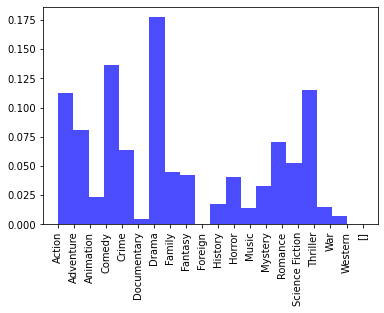

In [532]:
 # Code here
    
split_genres = pd.DataFrame(genres.str.split("'").tolist(), index=genres).stack()
split_genres = new_df.reset_index([0])
split_genres = split_genres[0]
split_genres = split_genres[split_genres != ',']
split_genres = genres_column.replace(['[',']',', '],"")

genre_df['genres'] = pd.DataFrame(split_genres)

indexNames = genre_df[genre_df['genres'] == '' ].index
genre_df.drop(indexNames , inplace=True)

plt.hist(genre_df['genres'], 20, density =1,facecolor="blue", alpha=0.7)
plt.xticks(rotation='vertical')
plt.show()

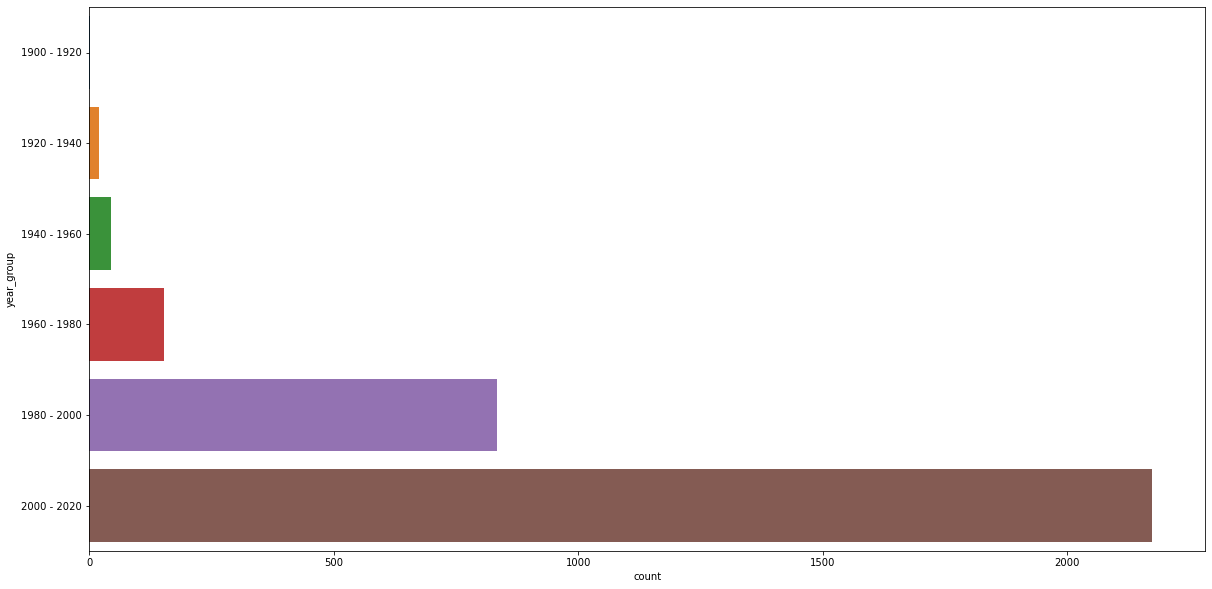

In [546]:
#### Generate three different interesting visualizations with a data story.

# Visualization 1 - Movies Released per double decade

movies_df['year_group'] = pd.cut(movies_df['DateTime_year'], [1900, 1920, 1940, 1960, 1980, 2000, 2020], 
                   labels=['1900 - 1920', '1920 - 1940', '1940 - 1960','1960 - 1980','1980 - 2000','2000 - 2020'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=movies_df['year_group'], data=movies_df);

[(1900.0, 2020.0)]

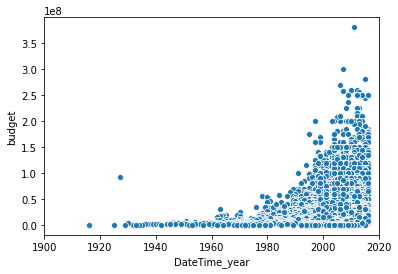

In [547]:
# Visualization 2 - Line plot representing budget growth over time

ax = sns.scatterplot(x="DateTime_year", y="budget",  data=movies_df)
ax.set(xlim=(1900, 2020))

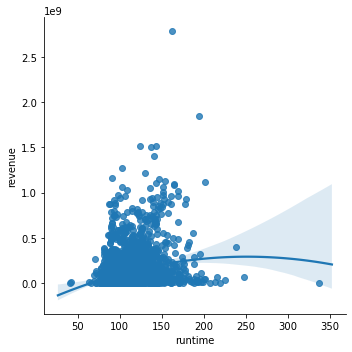

In [558]:
# Visualization 3 - 

ax = sns.lmplot(x="runtime", y="revenue", order=2, data=movies_df)

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualizations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)